# Part II - Factors Affecting Loan Status Outcome
## 


## Investigation Overview

For this presentation, I focus on effects of key variables from the dataset on Loan status which the main main variable used in this project. I started by briefly introducing the Loan Status variable, I followed it up by showing the relationships key variables have with the loan status variable.
 
## Dataset Overview

The dataset contains 113,937 loans with 81 variables on each loan including 'LoanStatus', 'BorrowerState', 'Occupation', 'EmploymentStatus', and 'IncomeRange' among others.
For the purpose of the project only 16 variables were explored which include:
"ListingKey", "ListingNumber", "Term", "LoanStatus", "BorrowerAPR", "BorrowerRate", "LenderYield", "ListingCategory (numeric)", "BorrowerState", "Occupation", "EmploymentStatus", "IsBorrowerHomeowner", "IncomeRange", "IncomeVerifiable", "StatedMonthlyIncome","Investors"

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")

In [3]:
# 16 columns were selected from the Dataset to aid easier exploration and visualization process
df1 = df.loc[:,["ListingKey", "ListingNumber", "Term", "LoanStatus", "BorrowerAPR", "BorrowerRate", "LenderYield",
                "ListingCategory (numeric)", "BorrowerState", "Occupation", "EmploymentStatus", "IsBorrowerHomeowner",
                "IncomeRange", "IncomeVerifiable", "StatedMonthlyIncome","Investors"]]

In [4]:
# Checking for the null values in the the new dataset
df1.isna().sum()

ListingKey                      0
ListingNumber                   0
Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
LenderYield                     0
ListingCategory (numeric)       0
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
IsBorrowerHomeowner             0
IncomeRange                     0
IncomeVerifiable                0
StatedMonthlyIncome             0
Investors                       0
dtype: int64

In [5]:
# Checking for the percentage of null values in columns
sum = df1.isna().sum()
round(sum/len(df1) * 100, 2)

ListingKey                   0.00
ListingNumber                0.00
Term                         0.00
LoanStatus                   0.00
BorrowerAPR                  0.02
BorrowerRate                 0.00
LenderYield                  0.00
ListingCategory (numeric)    0.00
BorrowerState                4.84
Occupation                   3.15
EmploymentStatus             1.98
IsBorrowerHomeowner          0.00
IncomeRange                  0.00
IncomeVerifiable             0.00
StatedMonthlyIncome          0.00
Investors                    0.00
dtype: float64

In [6]:
# This function checks the datatype of the each column and fill the null values with its mean/mode
def myfillna(series):
    """This function checks the datatype of the column and fill the null values with its mean for integer and float
    datatypes and mode for string datatypes"""
    if series.dtype is np.dtype(int):
        return series.fillna(series.mean())
    if series.dtype is np.dtype(float):
        return series.fillna(series.mean())
    if series.dtype is np.dtype("O"):
        return series.fillna(series.mode()[0])
    else:
        return series

In [7]:
# Applying the myfillna function to dataframe
df1 = df1.apply(lambda x: myfillna(x))

#convert IncomeRange into ordered categorical types
income_range_dict = {"$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999",
                    "$100,000+", "Not employed", "Not displayed"}

# Return the ordered dict into income range column
income_range = pd.api.types.CategoricalDtype(ordered = True, categories = income_range_dict)

# Use pandas.astype() to convert the "IncomeRange" column from plain object to an ordered categorical type
df1["IncomeRange"] = df1["IncomeRange"].astype(income_range)

In [8]:
# The Listing Category (numeric) column contain numbers that are in categories
# The category of listing the borrower selected when postiing their listing. 
#I will map each number to its category

df1["ListingCategory (numeric)"] = df1["ListingCategory (numeric)"].map({0: "Not Available", 1: "Debt Consolidation", 2: "Home Improvement",
                                     3: "Business", 4: "Personal Loan", 5: "Student Use", 6: "Auto", 7: "Other",
                                     8: "Baby&Adoption", 9: "Boat", 10: "Cosmetic Procedure", 11: "Engagement Ring", 
                                    12: "Green Loans", 13: "Household Expenses", 14: "Large Purchases", 15: "Medical/Dental",
                                     16: "Motorcycle", 17: "RV", 18: "Taxes", 19: "Vacation", 20: "Wedding Loans"})

df1.rename(columns={"ListingCategory (numeric)": "ListingCategory"}, inplace= True)

## Distribution of Loan Status
The distribution of "Loan status" indicate that borrowers still servicing their loan have the 
highest numberin the dataset followed by customers that have completed loan repayment, about 12,000 customers are being chargedoff while less than 10,000 customer
have defaulted in loan payment.

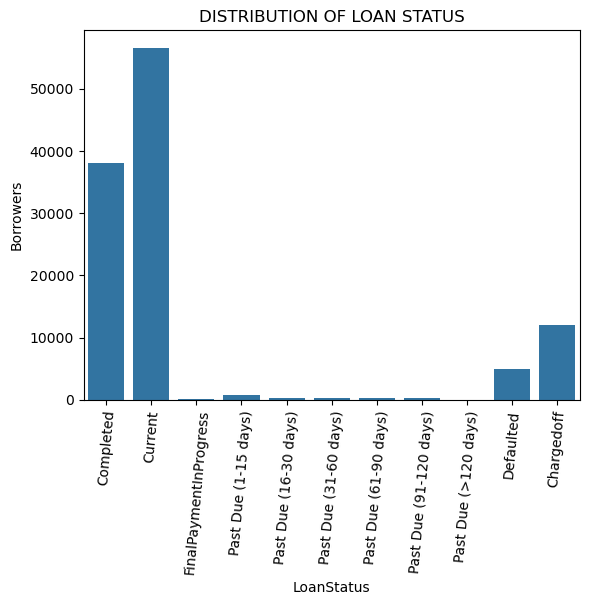

In [9]:
def countplot_1(column, ylabel):
    "function for countplot"
    order = ["Completed", "Current", "FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)",
    "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)", "Defaulted", "Chargedoff"]
    income_order = df1[column].value_counts().index
    base_color = sb.color_palette()[0]
    sb.countplot(data = df1, x = column, color = base_color, order = order)
    plt.title("Distribution of Loan Status".upper())
    plt.ylabel(ylabel)
    plt.xticks(rotation = 85)

countplot_1("LoanStatus", "Borrowers")

## Distribution of Listing Category

The borrower that took loan for debt consolidation are the highest in the dataset with close to 60000 borrowers,
while borrowers that do not specify the purpose for which loan was might for followed with about 18000 borrowers, borrowers that specify other purposes followed with 10000 borrowers in this category

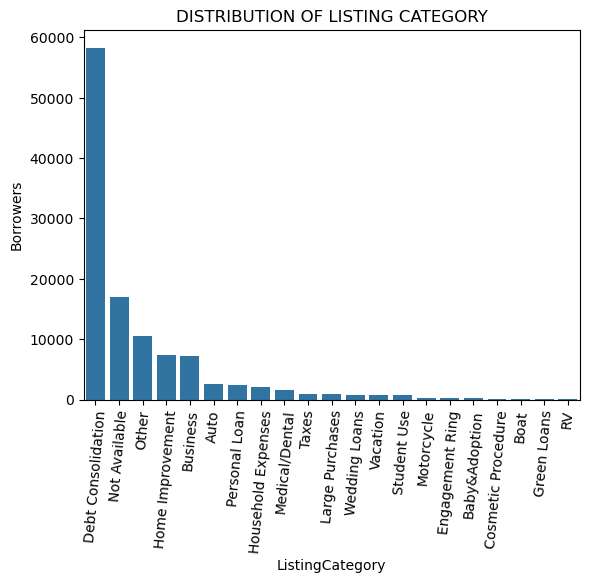

In [10]:
def countplot_2(column, ylabel):
    "function for countplot"
    income_order = df1[column].value_counts().index
    base_color = sb.color_palette()[0]
    sb.countplot(data = df1, x = column, color = base_color, order = income_order)
    plt.title("Distribution of Listing Category".upper())
    plt.ylabel(ylabel)
    plt.xticks(rotation = 85)

countplot_2("ListingCategory", "Borrowers")

## Distribution of Term(month) by Loan Status
The loans the have 12 month term has little activities we can see a little above 1000 for completed loans in this category,
but the situation was different with loan with 36 month term current and completed loans are the higshest in this class, 
loan that were charged off and defaulted loan also hhave 10000 and 5000 borrower respectively. Loans with 36 month term do
not have too many activities but current loans has the highest borrowers in this category.


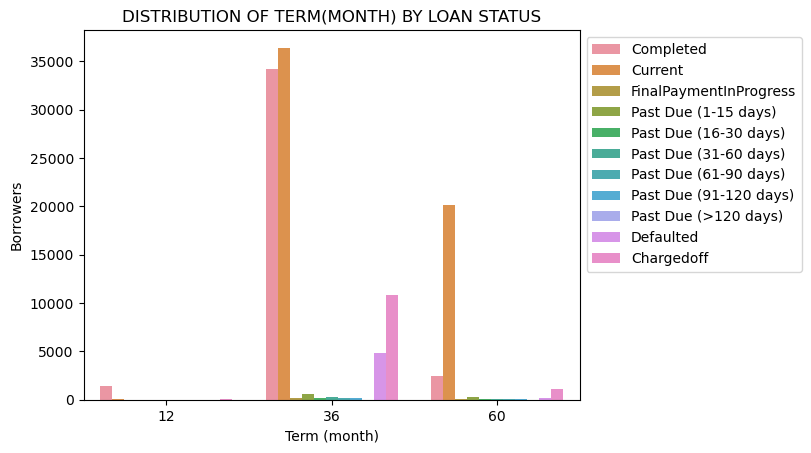

In [11]:
def bi_countplot(column, hue):
    order = ["Completed", "Current","FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)",
            "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)", "Defaulted", "Chargedoff"]
    sb.countplot(data = df1, x = column, hue = hue, hue_order= order)
    plt.xlabel("Term (month)")
    plt.ylabel("Borrowers")
    plt.title("Distribution of Term(month) by Loan Status".upper())
    plt.legend(loc = "best", bbox_to_anchor = (1, 1))
    
bi_countplot("Term", "LoanStatus")

## Distribution of BorrowerAPR and LenderYield by Loan Status

There is an interesting insight derived from the plot below when Loan status is combined with lenders yeild and borrowers interest rate: 
We see that there are high number of borrowers that were charged off between 20 to 35% lenderyield and  25 to 39 % borrowers interest rate. This means that there is higher chances of a borrower been charged off when the interest rate is high.Observe that there are borrowers that have completed loan payment across the plot, one interesting trend is that current borrowers interest rate tend to start around 12% up 40%, there was no interest rate beyond this point.

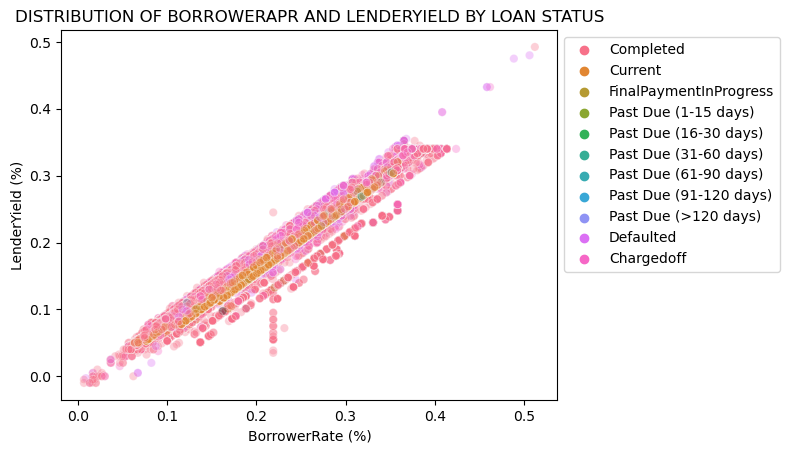

In [12]:
order = ["Completed", "Current", "FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)",
            "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)", "Defaulted", "Chargedoff"]
sb.scatterplot(data = df1, x = "BorrowerAPR", y = "LenderYield", hue = "LoanStatus", hue_order= order, alpha= 1/3)
plt.title("Distribution of BorrowerAPR and LenderYield by Loan Status".upper())
plt.ylabel("LenderYield (%)")
plt.xlabel("BorrowerRate (%)");
plt.legend(loc = "best", bbox_to_anchor = (1,1));

## Distribution of Loan Status and lenderYield by Homeowner

The general trend in the plot shows that most borrowers are not homeowners. In each category the 
False class has larger values than the True class, the only exception is the (FinalPaymentmentin 
progress) class which has as equal distribution between both True and False as regard homeowners

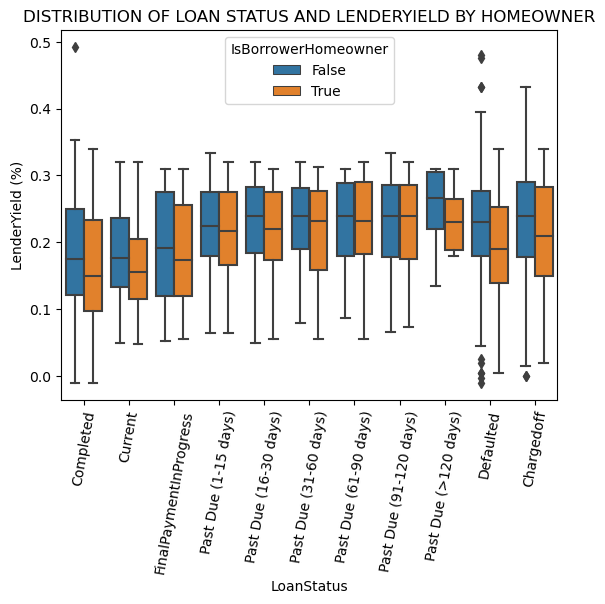

In [13]:
order = ["Completed", "Current", "FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)", 
         "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)", "Defaulted", "Chargedoff"]
sb.boxplot(data = df1, x ="LoanStatus", y = "LenderYield", hue= "IsBorrowerHomeowner", order= order)
plt.title("Distribution of Loan Status and lenderYield by Homeowner".upper())
plt.ylabel("LenderYield (%)")
plt.xticks(rotation = 80);

In [ ]:
!jupyter nbconvert Project_Loan_Data_from_Prosper_Part_II.ipynb --to slides --post serve --no-input --no-prompt